In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle

from plain_net.PlainNet import PlainNet

In [4]:
with open('data/duffing/duffing_train.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('data/duffing/duffing_test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [5]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [6]:
model = PlainNet([3, 64, 64, 64, 2])

In [7]:
model.train_n_epochs(train_loader=train_loader, n_epochs=1000, lr=0.001, verbose=True)

Epoch 0: loss 0.13692213594913483
Epoch 100: loss 0.00017280444444622844
Epoch 200: loss 0.00013348802167456597
Epoch 300: loss 9.829894406720996e-05
Epoch 400: loss 0.00021989276865497231
Epoch 500: loss 5.2264895202824846e-05
Epoch 600: loss 3.172497599734925e-05
Epoch 700: loss 4.284804526832886e-05
Epoch 800: loss 4.450832057045773e-05
Epoch 900: loss 6.0012149333488196e-05


In [8]:
y_pred = model(test_data.x).detach().numpy()

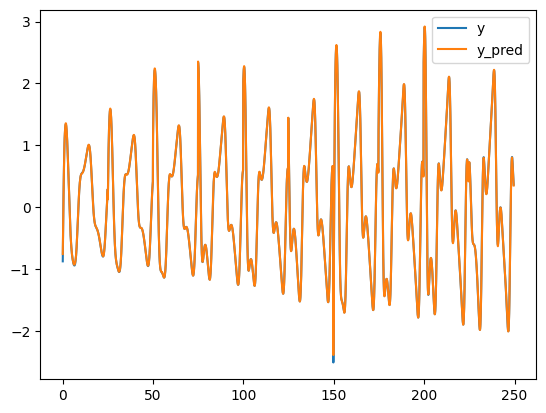

In [9]:
# plot y and y_pred
plt.plot(t_test, test_data.y[:, 0], label="y")
plt.plot(t_test, y_pred[:, 0], label="y_pred")
plt.legend()
plt.show()

In [10]:
for layer in model.layers:
    print(layer.weight.data)

tensor([[ 0.0024, -0.2247, -0.3045],
        [ 0.5076,  0.1083, -0.0274],
        [ 0.0255, -0.2628,  0.0396],
        [ 0.5281,  0.0059, -0.3289],
        [ 0.2484,  0.5157, -0.5064],
        [-0.0944,  0.2354,  0.4738],
        [-0.5798,  0.1380,  0.2529],
        [-0.4083,  0.1331, -0.3770],
        [ 0.6333,  0.3386, -0.4727],
        [-0.3016, -0.3905,  0.3591],
        [-0.5127,  0.1531, -0.2396],
        [ 0.5040,  0.0349, -0.5230],
        [-0.3640, -0.4233,  0.3073],
        [-0.6253,  0.4482,  0.4302],
        [ 0.0429, -0.0821, -0.4358],
        [ 0.2449,  0.4308, -0.6180],
        [-0.3463, -0.2427,  0.3574],
        [-0.5884,  0.1597, -0.0958],
        [-0.1511,  0.3495, -0.2409],
        [-0.5246,  0.0058, -0.0903],
        [-0.1112, -0.0860,  0.1490],
        [ 0.1934, -0.1288,  0.2251],
        [-0.2624, -0.4247,  0.6122],
        [ 0.7244,  0.0944, -0.2631],
        [-0.0858,  0.1387, -0.2257],
        [-0.2793,  0.4050,  0.2252],
        [ 0.2551,  0.0690,  0.2583],
 